### Description Generation for Images

Description Generation for Images included Two Major Domains Image Processing as well as NLTP [Natural Language and Text Processing]

* Image Processing used to Blob Detection in the Sense Object Detection and Recognition.

* NLTK [Natural Language and Text Processing] is used to Generate Text for the Blob We Detected in Image.

Rajath Kumar K S
Bangalore

![title](CNN_Basic.png)

### Training of Images for Object prediction using Keras Using TensorFlow Backend.

Importing Basic Packages Required for the Program.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Importing Machine learning Libraries Required for the Program. We're using sklearn Tools for Machine Learning.

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection  import train_test_split

Importing Deep learning Libraries for Training Images. We're using Keras with Tensor Flow BackGround

In [5]:
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [6]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop,adam

Reading paths

In [26]:
PATH = os.getcwd()
print(PATH)

DATA_PATH = PATH + '\data'
print(DATA_PATH)

DATA_DIR_LIST = os.listdir(DATA_PATH)
print(DATA_DIR_LIST)

C:\Users\Rajath Kumar K S\Downloads\CaptionGenerationandObjectDetection
C:\Users\Rajath Kumar K S\Downloads\CaptionGenerationandObjectDetection\data
['cats', 'dogs', 'horses', 'Humans']


![title](general-architecture-convnet.jpg)

Defining Configurations for Training Model

In [27]:
img_rows = 128
img_cols = 128
num_channel = 1
num_epoch = 25

Defining Number of Classes
* Classification of Images Different Type of Images in Different Folder
* In this Case Right Now I've Taken Four Classes of Images like 1. Dogs, 2. Cats, 3. Humans, 4. Horses

In [28]:
num_classes = 4

In [29]:
img_data_list = []

In [30]:
for dataset in DATA_DIR_LIST:
    img_list = os.listdir(DATA_PATH+'\\'+dataset)
    print('Loaded the images of Dataset - '+' {}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(DATA_PATH + '\\'+ dataset + '\\'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

Loaded the images of Dataset -  cats

Loaded the images of Dataset -  dogs

Loaded the images of Dataset -  horses

Loaded the images of Dataset -  Humans



In [31]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(808, 128, 128)


In [32]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)

(808, 1, 128, 128)


In [33]:
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [34]:
labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

In [35]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
names = ['cats','dogs','horses','humans']

In [37]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [38]:
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [39]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
# Defining the model

# dimensions of our images.
#img_width, img_height = 224, 224

#if K.image_data_format() == 'channels_first':
#    input_shape = (3, img_width, img_height)
#else:
#    input_shape = (img_width, img_height, 3)

input_shape=img_data[0].shape

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

![title](CNN_Advanced.png)

In [41]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 126, 126)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 126, 126)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 124, 124)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 124, 124)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 62, 62)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 62, 62)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 60, 60)        18496     
__________

True

![title](softmax.jpg)

In [42]:
print("Model Training Started Wait a While Until It's Get Completed")
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
print("Model Training Completed")

Model Training Started Wait a While Until It's Get Completed
Train on 646 samples, validate on 162 samples
Epoch 1/25
646/646 [==============================] - 148s 229ms/step - loss: 1.5379 - acc: 0.2647 - val_loss: 1.3805 - val_acc: 0.2346
Epoch 2/25
646/646 [==============================] - 161s 249ms/step - loss: 1.3407 - acc: 0.3669 - val_loss: 1.2647 - val_acc: 0.3951
Epoch 3/25
646/646 [==============================] - 157s 244ms/step - loss: 1.2209 - acc: 0.4489 - val_loss: 1.2099 - val_acc: 0.4815
Epoch 4/25
646/646 [==============================] - 160s 247ms/step - loss: 1.1311 - acc: 0.5015 - val_loss: 1.2062 - val_acc: 0.4815
Epoch 5/25
646/646 [==============================] - 156s 241ms/step - loss: 1.0138 - acc: 0.5789 - val_loss: 1.1582 - val_acc: 0.5185
Epoch 6/25
646/646 [==============================] - 175s 271ms/step - loss: 0.9134 - acc: 0.6146 - val_loss: 1.0639 - val_acc: 0.5247
Epoch 7/25
646/646 [==============================] - 210s 325ms/step - loss:

In [43]:
%matplotlib inline

### Training and Accuracy Curve
![Reference for Training and Accuracy Curve](earlystop.png)

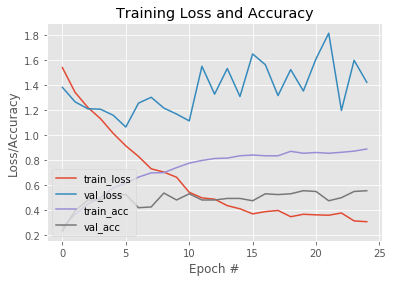

In [44]:
plt.style.use("ggplot")
plt.figure()
N = num_epoch
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [45]:
# Training with callbacks
from keras import callbacks

In [46]:
filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

In [47]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='min')

In [48]:
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

In [49]:
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [50]:
callbacks_list = [csv_log,early_stopping,checkpoint]

In [51]:
print("Model Training Started Wait a While Until It's Get Completed")
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)
print("Model Training Completed")

Model Training Started Wait a While Until It's Get Completed
Train on 646 samples, validate on 162 samples
Epoch 1/25
646/646 [==============================] - 179s 277ms/step - loss: 0.3625 - acc: 0.8390 - val_loss: 1.6208 - val_acc: 0.4938

Epoch 00001: val_loss improved from inf to 1.62075, saving model to Best-weights-my_model-001-0.3625-0.8390.hdf5
Epoch 2/25
646/646 [==============================] - 203s 314ms/step - loss: 0.3510 - acc: 0.8669 - val_loss: 1.7326 - val_acc: 0.4938

Epoch 00002: val_loss did not improve from 1.62075
Epoch 3/25
646/646 [==============================] - 159s 247ms/step - loss: 0.3829 - acc: 0.8437 - val_loss: 1.4525 - val_acc: 0.5494

Epoch 00003: val_loss improved from 1.62075 to 1.45247, saving model to Best-weights-my_model-003-0.3829-0.8437.hdf5
Epoch 4/25
646/646 [==============================] - 182s 281ms/step - loss: 0.4143 - acc: 0.8514 - val_loss: 1.4344 - val_acc: 0.5062

Epoch 00004: val_loss improved from 1.45247 to 1.43439, saving m

In [66]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(6)

In [67]:
train_loss

[0.3625010556019497,
 0.3510149658741228,
 0.3829233427719435,
 0.41431847592994525,
 0.3867188396837689,
 0.35288972326845575]

In [68]:
train_acc

[0.8390092877411621,
 0.8668730650154799,
 0.8436532505894593,
 0.8513931886699546,
 0.8699690402476781,
 0.8622291019826481]

In [69]:
val_loss

[1.62075396526007,
 1.7326229766563133,
 1.4524739759939689,
 1.4343875484702029,
 1.4353121563240334,
 1.602714595971284]

In [70]:
val_acc

[0.49382716049382713,
 0.49382716049382713,
 0.5493827160493827,
 0.5061728395061729,
 0.5493827160493827,
 0.5]

In [71]:
%matplotlib inline

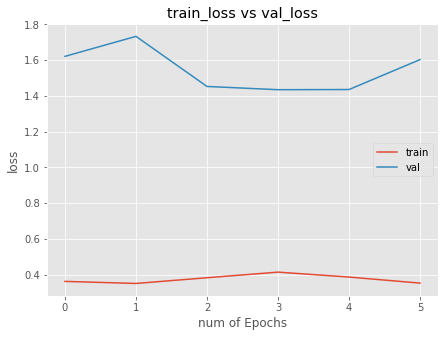

In [72]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

In [73]:
%matplotlib inline

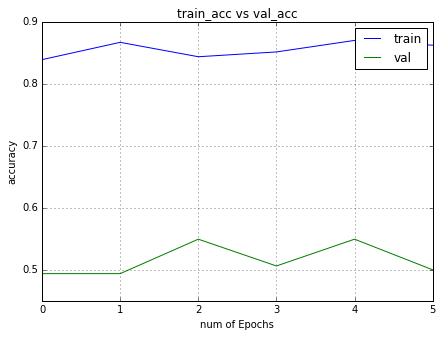

In [74]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

In [75]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.6027146077450412
Test accuracy: 0.5


In [76]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 1, 128, 128)


In [77]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[6.9700298e-05 2.0247183e-03 9.9627352e-01 1.6321237e-03]]
[2]
[[0. 0. 1. 0.]]


In [78]:
test_image = cv2.imread('data/Humans/rider-8.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(128, 128)


In [79]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

(1, 1, 128, 128)


In [80]:
print((model.predict(test_image)))

[[0.00778023 0.0074342  0.00173834 0.9830472 ]]


In [81]:
print(model.predict_classes(test_image))

[3]
